In [56]:
import os

currentDirectory = os.getcwd()

currentDirectory

'C:\\Users\\100079424\\Desktop\\assign2'

In [57]:
# Libraries for RandomForestClassifier (RFC)
import matplotlib
import math
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

# Libraries for creating training data
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle
import itertools

# Libraries for creating the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [58]:
#for accessing data in local
DATADIR = currentDirectory + "/covid"
CATEGORIES = ["COVID","non-COVID"]

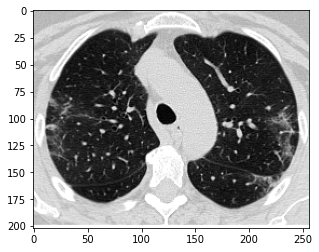

In [59]:
# Displaying the first image in the dataset
for category in CATEGORIES:  # do for all CT scan images of COVID and non-COVID
    path = os.path.join(DATADIR,category)  # create path to COVID and non-COVID
    for img in os.listdir(path):  # iterate over each COVID and non-COVID image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [60]:
#display out the size of image
print(img_array.shape)

(202, 256)


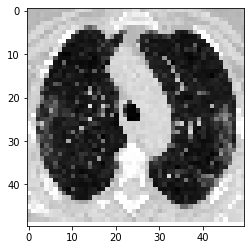

In [61]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [62]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do for all covid and non-covid

        path = os.path.join(DATADIR,category)  # create path to covid and non-covid
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1). 0=Covid 1=non-Covid

        for img in tqdm(os.listdir(path)):  # iterate over each image for Covid and non-Covid
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1229/1229 [00:02<00:00, 448.43it/s]

2481


In [63]:
#data randomize to prevent bias results by the order of the data
random.shuffle(training_data)

In [64]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
0
1
1
0


In [65]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#re-arrange pixels into a square instead of pixels arranged in a line/row
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[203]
   [204]
   [204]
   ...
   [204]
   [205]
   [206]]

  [[204]
   [205]
   [205]
   ...
   [207]
   [207]
   [206]]

  [[204]
   [206]
   [205]
   ...
   [206]
   [204]
   [205]]

  ...

  [[208]
   [207]
   [209]
   ...
   [204]
   [207]
   [206]]

  [[206]
   [207]
   [203]
   ...
   [203]
   [205]
   [206]]

  [[206]
   [204]
   [206]
   ...
   [207]
   [207]
   [219]]]]


In [66]:
# Exporting processed images into pickle files
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [67]:
#run this if the pickle file is available
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [68]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [69]:
#Converting the labels into numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

#Normalising the features of images
X_train = X_train/255.0
X_test = X_test/255.0

In [70]:
#export train and test data into pickle file
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [71]:
#run this if the pickle file is available
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# **Random Forest**

In [117]:
# Machine Learning Section
# Random Forest Classifier
# Initialize the Classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=5)

X_train_rfc = X_train
y_train_rfc = y_train

X_test_rfc = X_test
y_test_rfc = y_test


# fit the model
rfc.fit(X_train_rfc.reshape(len(X_train_rfc), -1), y_train_rfc)

RandomForestClassifier(n_estimators=5, n_jobs=-1)

In [118]:
rfc.score(X_test_rfc.reshape(len(X_test_rfc), -1), y_test_rfc)

# obtain predictions from Random Forest Classifier and save it to a variable
y_pred = rfc.predict(X_test_rfc.reshape(len(X_test_rfc), -1))

In [119]:
#function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=True,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    sizeplot = plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar(sizeplot, shrink = 0.70)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix, with Normalization")
        print(cm, "\n")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j],".2f"),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    else:
        print("Confusion Matrix, without Normalization")
        print(cm, "\n")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    

    
    plt.tight_layout()
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [120]:
cm = confusion_matrix(y_true = y_test,y_pred = y_pred)

#Accuracy - refers to the number of correct predictions by the machine learning algorithm
#Formula accuracy = (True Positive - TP + True Negative - TN)/ 
#(True Positive - TP + True Negative - TN + False Positive - FP + False Negative - FN)
accuracy = metrics.accuracy_score(y_true = y_test_rfc, y_pred = y_pred)
print("Accuracy sklearn: {}".format(accuracy), "\n")


#overall accuracy - weighted average of a test's sensitivity and specificity   
#overall accuracy = (total number of correct classified values - TP + TN)/ total values
print("Overall Accuracy:", accuracy_score(y_test_rfc,y_pred), "\n")


Accuracy sklearn: 0.8201342281879195 

Overall Accuracy: 0.8201342281879195 



Confusion Matrix, with Normalization
[[0.781491   0.218509  ]
 [0.13764045 0.86235955]] 



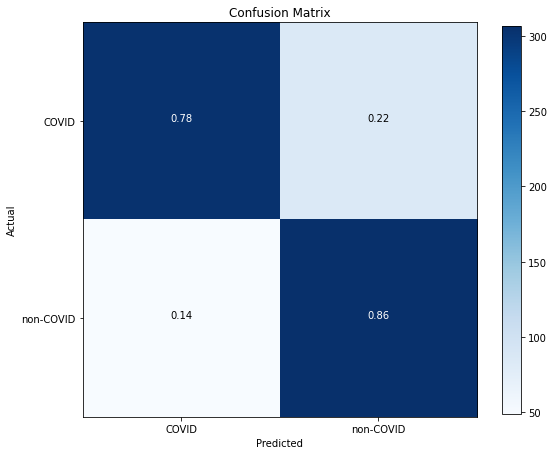

In [121]:
# plot the confusion matrix
plot_confusion_matrix(cm, CATEGORIES, normalize=True)

Confusion Matrix, without Normalization
[[304  85]
 [ 49 307]] 



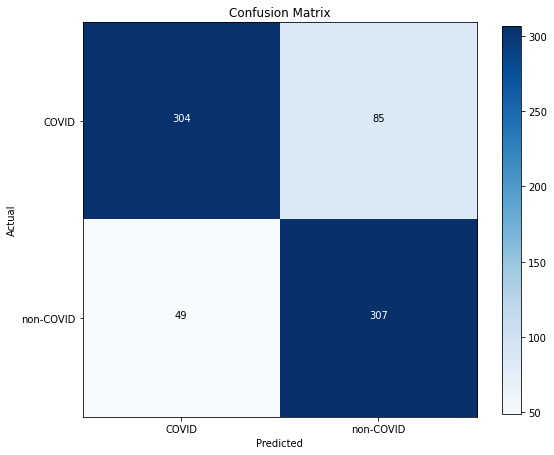

In [122]:
# plot the confusion matrix
plot_confusion_matrix(cm,CATEGORIES, normalize=None)

In [123]:
# Classification report - used to compare between classification models to choose the best model
print("Classification Report")
names = CATEGORIES
print(classification_report(y_test_rfc,y_pred, target_names=names), "\n")

#ravel is a function from scikit-learn to flatten the arrays by turning it into lists of coordinates
TP, FP, FN, TN = confusion_matrix(y_test_rfc, y_pred).ravel()
print("Check Value Metrics:")
print("TP :", TP)
print("FP :", FP)
print("FN :", FN)
print("TN :", TN)

#True Positive Rate - model created correctly predicts the positive class (covid)
#TPR = True Positive (TP)/True Positive (TP) + False Negative (FN)
TPR = TP/(TP + FN)
print("True Positive Rate                 :", TPR)

#Specificity(True Negative Rate) - total correct negative predictions/ total negatives
#TNR - model created correctly predicts the negative class (not covid)
#Formula Specificity (True Negative Rate) = (True Negative - TN)/(True Negative - TN + False Positive - FP)
TNR = TN/(TN + FP)
print("True Positive Rate (Specificity)   :", TNR)

#False Positive Rate - the classification model predicts negative class falsely (covid)
#FPR = False Positive (FP)/True Negative (TN) + False Positive (FP)
FPR = FP/(FP + TN)
print("False Positive Rate                :", FPR)

#False Negative Rate (miss rate) - the classification model predicts positive class falsely (not covid)
#FNR = False Negative (FN)/True Positive (TP) + False Negative (FN)
FNR = FN/(FN + TP)
print("False Negative Rate (Miss rate)    :", FNR)

precision, recall, threshold = precision_recall_curve(y_test_rfc,y_pred)
#precision - proportions of correct predictions correspond to actual results 
#predicted by the machine learning algorithm in decimal
#Formula Precision = (True Positive - TP)/(True Positive - TP + False Positive - FP)
print("Precision   :", TP/(TP + FP))

#recall(sensitivity) - proportion of correct positive predictions
#Formula Recall = (True Positive - TP)/(True Positive - TP + False Negative - FN)
print("Recall      :", TP/(TP + FN))

#classification threhold - value that separates 
#and identifies respective labels depending on the line below or above (COVID, NOT COVID)
print("Threshold   :", threshold)

#F1 Score - a measure of models accuracy in a dataset and evaluate binary classification systems
#Formula F1Score = (2*Precision*Recall)/ (Precision*Recall)
print("F1 Score:   :", f1_score(y_test_rfc, y_pred))


Classification Report
              precision    recall  f1-score   support

       COVID       0.86      0.78      0.82       389
   non-COVID       0.78      0.86      0.82       356

    accuracy                           0.82       745
   macro avg       0.82      0.82      0.82       745
weighted avg       0.82      0.82      0.82       745
 

Check Value Metrics:
TP : 304
FP : 85
FN : 49
TN : 307
True Positive Rate                 : 0.8611898016997167
True Positive Rate (Specificity)   : 0.7831632653061225
False Positive Rate                : 0.21683673469387754
False Negative Rate (Miss rate)    : 0.1388101983002833
Precision   : 0.781491002570694
Recall      : 0.8611898016997167
Threshold   : [0 1]
F1 Score:   : 0.8208556149732621


In [124]:
#function to plot ROC curve between True Positive Rate and False Positive Rate
def plot_roc(pred, y):
    fpr,tpr, _ = metrics.roc_curve(y,pred)
    roc_auc = metrics.auc(fpr,tpr)
    print("Area Under Curve:", format(roc_auc, ".2f") )
    plt.title("Receiver Operator Characteristics (ROC) for RFC")
    plt.plot(fpr,tpr,label = "ROC Curve Area = {0:2g}".format(roc_auc))
    plt.plot([0,1],[1,0],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.8])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = "lower right")
    plt.show

Area Under Curve: 0.82


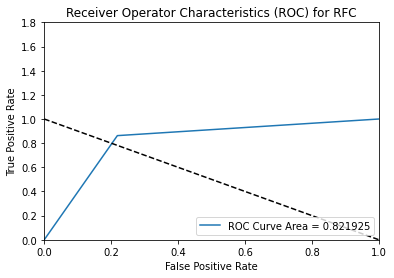

In [125]:
plot_roc(y_pred, y_test) #displays the ROC curve